In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns',None)
%matplotlib inline

In [4]:
#读取数据
accepts = pd.read_csv('C:/Users/acerpc/Desktop/code&data/accepts.csv')
accepts.head()

,application_id,account_number,bad_ind,vehicle_year,vehicle_make,bankruptcy_ind,tot_derog,tot_tr,age_oldest_tr,tot_open_tr,tot_rev_tr,tot_rev_debt,tot_rev_line,rev_util,fico_score,purch_price,msrp,down_pyt,loan_term,loan_amt,ltv,tot_income,veh_mileage,used_ind,weight
0,2314049,11613,1,1998.0,FORD,N,7.0,9.0,64.0,2.0,1.0,506.0,500.0,101,650.0,17200.00,17350.0,0.00,36,17200.00,99.0,6550.00,24000.0,1,1.00
1,63539,13449,0,2000.0,DAEWOO,N,0.0,21.0,240.0,11.0,7.0,34605.0,57241.0,60,649.0,19588.54,19788.0,683.54,60,19588.54,99.0,4666.67,22.0,0,4.75
2,7328510,14323,1,1998.0,PLYMOUTH,N,7.0,10.0,60.0,NaN,NaN,NaN,NaN,0,613.0,13595.00,11450.0,0.00,60,10500.00,92.0,2000.00,19600.0,1,1.00
3,8725187,15359,1,1997.0,FORD,N,3.0,10.0,35.0,5.0,4.0,4019.0,5946.0,68,603.0,12999.00,12100.0,3099.00,60,10800.00,118.0,1500.00,10000.0,1,1.00
4,4275127,15812,0,2000.0,TOYOTA,N,0.0,10.0,104.0,2.0,0.0,0.0,1800.0,0,764.0,26328.04,22024.0,0.00,60,26328.04,122.0,4144.00,14.0,0,4.75


In [5]:
#数据预处理
accepts.dtypes

application_id      int64
account_number      int64
bad_ind             int64
vehicle_year      float64
vehicle_make       object
bankruptcy_ind     object
tot_derog         float64
tot_tr            float64
age_oldest_tr     float64
tot_open_tr       float64
tot_rev_tr        float64
tot_rev_debt      float64
tot_rev_line      float64
rev_util            int64
fico_score        float64
purch_price       float64
msrp              float64
down_pyt          float64
loan_term           int64
loan_amt          float64
ltv               float64
tot_income        float64
veh_mileage       float64
used_ind            int64
weight            float64
dtype: object

In [6]:
accepts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5845 entries, 0 to 5844
Data columns (total 25 columns):
application_id    5845 non-null int64
account_number    5845 non-null int64
bad_ind           5845 non-null int64
vehicle_year      5844 non-null float64
vehicle_make      5546 non-null object
bankruptcy_ind    5628 non-null object
tot_derog         5632 non-null float64
tot_tr            5632 non-null float64
age_oldest_tr     5629 non-null float64
tot_open_tr       4426 non-null float64
tot_rev_tr        5207 non-null float64
tot_rev_debt      5367 non-null float64
tot_rev_line      5367 non-null float64
rev_util          5845 non-null int64
fico_score        5531 non-null float64
purch_price       5845 non-null float64
msrp              5844 non-null float64
down_pyt          5845 non-null float64
loan_term         5845 non-null int64
loan_amt          5845 non-null float64
ltv               5844 non-null float64
tot_income        5840 non-null float64
veh_mileage       5844 no

In [7]:
accepts.describe(include='all')

,application_id,account_number,bad_ind,vehicle_year,vehicle_make,bankruptcy_ind,tot_derog,tot_tr,age_oldest_tr,tot_open_tr,tot_rev_tr,tot_rev_debt,tot_rev_line,rev_util,fico_score,purch_price,msrp,down_pyt,loan_term,loan_amt,ltv,tot_income,veh_mileage,used_ind,weight
count,5.845000e+03,5.845000e+03,5845.000000,5844.000000,5546,5628,5632.000000,5632.000000,5629.000000,4426.000000,5207.000000,5367.000000,5367.000000,5845.000000,5531.000000,5845.000000,5844.000000,5845.000000,5845.000000,5845.000000,5844.00000,5.840000e+03,5844.000000,5845.000000,5845.000000
unique,NaN,NaN,NaN,NaN,154,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,FORD,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,1112,5180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.039359e+06,5.021740e+06,0.204790,1901.793634,NaN,NaN,1.910156,17.084695,154.304317,5.720063,3.093336,6218.619899,18262.655674,43.444482,693.528657,19145.235109,18643.180243,1325.375624,56.806159,17660.066222,98.78525,6.206255e+03,20167.981348,0.564756,3.982036
std,2.880450e+06,2.873516e+06,0.403583,488.024392,NaN,NaN,3.274744,10.814056,99.940540,3.165783,2.401923,8657.667616,20942.605070,75.289977,57.841522,9356.070282,10190.495573,2435.177463,14.547659,9095.267595,18.08215,1.073186e+05,29464.181138,0.495831,1.513436
min,4.065000e+03,1.161300e+04,0.000000,0.000000,NaN,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,443.000000,0.000000,0.000000,0.000000,12.000000,2133.400000,0.00000,0.000000e+00,0.000000,0.000000,1.000000
25%,2.513980e+06,2.567174e+06,0.000000,1997.000000,NaN,NaN,0.000000,9.000000,78.000000,3.000000,1.000000,791.000000,3235.500000,5.000000,653.000000,12684.000000,12050.000000,0.000000,51.000000,11023.000000,90.00000,2.218245e+03,1.000000,0.000000,4.750000
50%,5.110443e+06,4.988152e+06,0.000000,1999.000000,NaN,NaN,0.000000,16.000000,137.000000,5.000000,3.000000,3009.000000,10574.000000,30.000000,693.000000,18017.750000,17475.000000,500.000000,60.000000,16200.000000,100.00000,3.400000e+03,8000.000000,1.000000,4.750000
75%,7.526973e+06,7.556672e+06,0.000000,2000.000000,NaN,NaN,2.000000,24.000000,205.000000,7.000000,4.000000,8461.500000,26196.000000,66.000000,735.500000,24500.000000,23751.250000,1750.000000,60.000000,22800.000000,109.00000,5.156250e+03,34135.500000,1.000000,4.750000


In [8]:
accepts['bad_ind']=accepts['bad_ind'].astype('category')
accepts['used_ind']=accepts['used_ind'].astype('category')#设置成分类变量

In [9]:
pd.Categorical(values=accepts['bankruptcy_ind'],ordered=True,categories=['Y','N'])

[N, N, N, N, N, ..., N, Y, N, N, N]
Length: 5845
Categories (2, object): [Y < N]

In [10]:
#分类变量分析
accepts['bad_ind'].groupby(accepts['bad_ind']).count()

bad_ind
0    4648
1    1197
Name: bad_ind, dtype: int64

In [11]:
accepts['bad_ind'].value_counts()

0    4648
1    1197
Name: bad_ind, dtype: int64

In [12]:
#连续变量分析
fs = accepts['fico_score']
fs.head()

0    650.0
1    649.0
2    613.0
3    603.0
4    764.0
Name: fico_score, dtype: float64

In [13]:
#集中趋势
print('mean=%.2f'%fs.mean())
print('median=%.2f'%fs.median())
print('mod=%.4f'%fs.mode())#众数
print('quantiles:')
print(fs.quantile([0.25,0.5,0.75]))

mean=693.53
median=693.00
mod=705.0000
quantiles:
0.25    653.0
0.50    693.0
0.75    735.5
Name: fico_score, dtype: float64


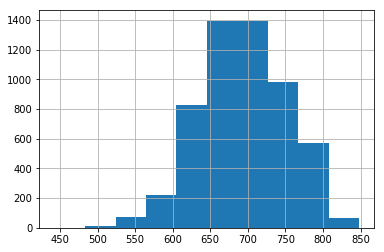

In [14]:
fs.hist(bins=10)

In [15]:
#离散程度
print('mad=%.4f'%fs.mad())#平均绝对偏差mad=np.abs(fs-fs.mean()).mean()
print('range=%.2f'%(fs.max(skipna=True)-fs.min(skipna=True)))#极差
print('var=%.4f'%fs.var())
print('std=%.4f'%fs.std())

mad=46.9740
range=405.00
var=3345.6416
std=57.8415


D:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


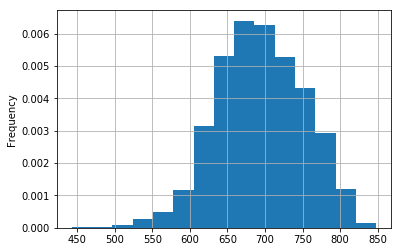

In [16]:
#数据的偏度与峰度- fico_score:正态
fs.dropna().plot(kind='hist',grid=True,normed=True,bins=15)

In [17]:
print('偏度：%6.4f'%fs.skew(skipna=True))
print('峰度：%6.4f'%fs.kurt(skipna=True))

偏度：-0.1484
峰度：-0.1941


skewness=1.2041
kourtosis=5.1247


D:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


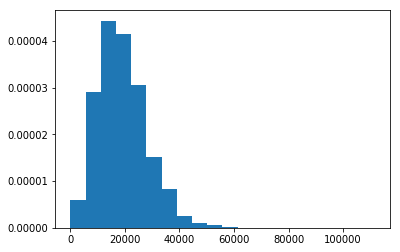

In [18]:
#urch_price:右偏
plt.hist(accepts.purch_price,bins=20,normed=True)
print('skewness=%6.4f'%accepts.purch_price.skew())
print('kourtosis=%6.4f'%accepts.purch_price.kurt())

In [19]:
from scipy import stats

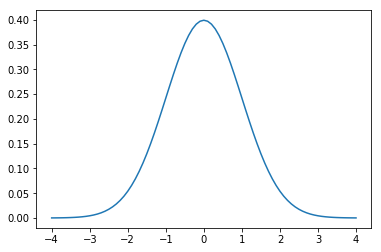

In [20]:
#分布- 正态分布模拟函数
x = list(pd.Series(range(-40,41)).map(lambda x:x/10.))
#x=list(map(lambda x:x/10.,range(-40,41)))
norm = stats.norm.pdf(x,loc=0,scale=1)#随机正态分布概率密度(均值为0，标准差为1)
plt.plot(x,norm)

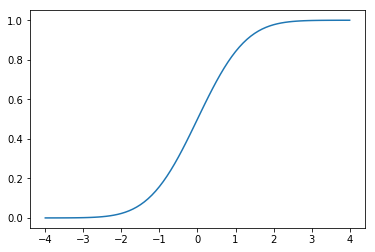

In [21]:
cumnorm = stats.norm.cdf(x)
plt.plot(x,cumnorm)#累积频率分布

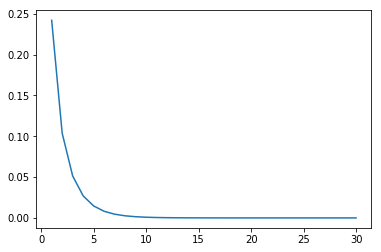

In [22]:
#卡方分布模拟
x = range(1, 31)
chi = stats.chi2.pdf(x,df=1,loc=0,scale=1)#生成自由度为3的卡方分布概率密度
plt.plot(x,chi)

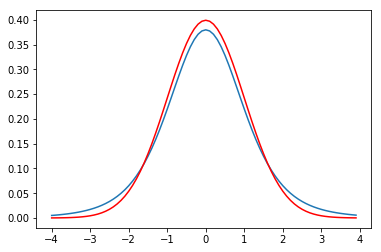

In [23]:
#t分布模拟
x = np.arange(-4, 4, 0.1)
t = stats.t.pdf(x,df=5,loc=0,scale=1)#生成自由度为5的t分布的概率密度值
n = stats.norm.pdf(x)
plt.plot(x,t)
plt.plot(x,n,color='r')

Text(0,100000,'purch_price VS loan_amt')

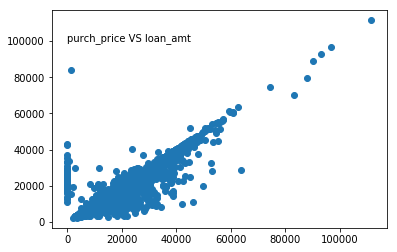

In [24]:
#简单绘图
#散点图
plt.scatter(accepts.purch_price,accepts.loan_amt)
plt.text(0,100000,'purch_price VS loan_amt')

In [25]:
#条形图、柱状图
accepts.head()

,application_id,account_number,bad_ind,vehicle_year,vehicle_make,bankruptcy_ind,tot_derog,tot_tr,age_oldest_tr,tot_open_tr,tot_rev_tr,tot_rev_debt,tot_rev_line,rev_util,fico_score,purch_price,msrp,down_pyt,loan_term,loan_amt,ltv,tot_income,veh_mileage,used_ind,weight
0,2314049,11613,1,1998.0,FORD,N,7.0,9.0,64.0,2.0,1.0,506.0,500.0,101,650.0,17200.00,17350.0,0.00,36,17200.00,99.0,6550.00,24000.0,1,1.00
1,63539,13449,0,2000.0,DAEWOO,N,0.0,21.0,240.0,11.0,7.0,34605.0,57241.0,60,649.0,19588.54,19788.0,683.54,60,19588.54,99.0,4666.67,22.0,0,4.75
2,7328510,14323,1,1998.0,PLYMOUTH,N,7.0,10.0,60.0,NaN,NaN,NaN,NaN,0,613.0,13595.00,11450.0,0.00,60,10500.00,92.0,2000.00,19600.0,1,1.00
3,8725187,15359,1,1997.0,FORD,N,3.0,10.0,35.0,5.0,4.0,4019.0,5946.0,68,603.0,12999.00,12100.0,3099.00,60,10800.00,118.0,1500.00,10000.0,1,1.00
4,4275127,15812,0,2000.0,TOYOTA,N,0.0,10.0,104.0,2.0,0.0,0.0,1800.0,0,764.0,26328.04,22024.0,0.00,60,26328.04,122.0,4144.00,14.0,0,4.75


In [26]:
data = pd.DataFrame({'a':np.arange(1,11),'b':np.random.randn(10)})
data.T

,0,1,2,3,4,5,6,7,8,9
a,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000
b,-0.203392,0.807589,-0.063347,0.423818,0.740862,0.169234,-0.009582,-0.597866,0.071541,0.892887


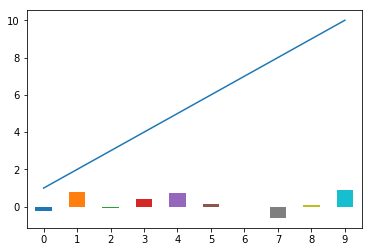

In [27]:
data.b.plot(kind='bar')
data.a.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EFE24B1B00>,
      dtype=object)

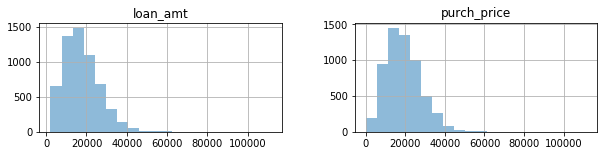

In [28]:
accepts[['purch_price', 'loan_amt']].hist(bins=20,alpha=0.5,figsize=(10,2))

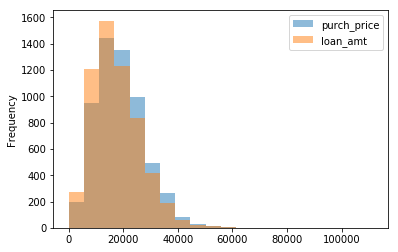

In [30]:
#直方图
accepts[['purch_price', 'loan_amt']].plot(kind='hist',stacked=False,bins=20,alpha=0.5)

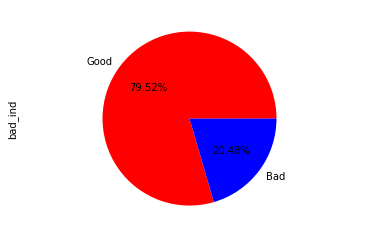

In [43]:
#饼图
pie = accepts.bad_ind.value_counts()
plt.axis('equal')
pie.plot(kind='pie',labels=['Good','Bad'],colors=['r','b'],autopct='%.2f%%')

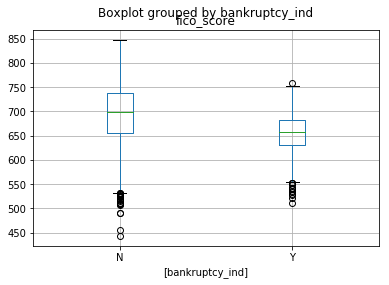

In [46]:
#箱线图
accepts[['fico_score', 'bankruptcy_ind']].boxplot(by='bankruptcy_ind')

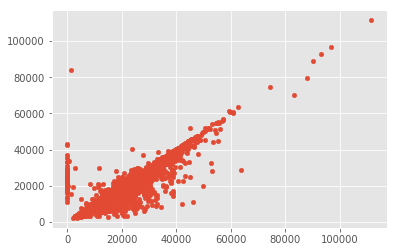

In [50]:
#使用ggplot风格
import matplotlib
matplotlib.style.use('ggplot')
plt.scatter(accepts.purch_price,accepts.loan_amt,s=20)

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


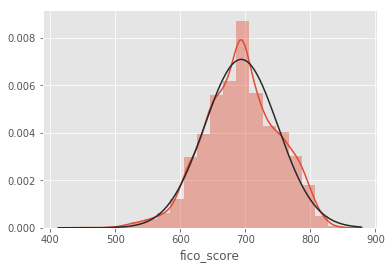

In [60]:
#使用seaborn
import seaborn as sns
vmean = accepts.fico_score.mean()
fs.fillna(vmean)
sns.distplot(fs,bins=20,kde=True,fit=stats.norm)